In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [17]:
def plot_degree_distribution(edge_file):
    # Create an empty graph
    G = nx.Graph()

    # Read the edge list from the file and add to the graph
    G = nx.read_edgelist(edge_file, nodetype=int)

    # print the max and min degree of this graph with the node id that has the max and min degree
    print("Max degree: %d" % max(dict(G.degree()).values()))
    print("Min degree: %d" % min(dict(G.degree()).values()))
    print("Max degree node id: %d" % max(dict(G.degree()).items(), key=lambda x: x[1])[0])
    print("Min degree node id: %d" % min(dict(G.degree()).items(), key=lambda x: x[1])[0])
    # Get the degree of each node
    degrees = [G.degree(n) for n in G.nodes()]

    # Plot the degree distribution
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), density=False, edgecolor='blue')
    plt.title(edge_file)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

In [14]:
def plot_node_degrees(edge_file):
    # Create an empty graph
    G = nx.Graph()

    # Read the edge list from the file and add to the graph
    G = nx.read_edgelist(edge_file, nodetype=int)

    # Get the nodes and their degrees
    nodes = G.nodes()
    degrees = [G.degree(n) for n in nodes]

    # Plot the degrees of nodes
    plt.figure(figsize=(10, 5))  # Adjust as needed
    plt.bar(nodes, degrees, color='blue', edgecolor='black')
    plt.title("edge_file")
    plt.xlabel("Nodev ID")
    plt.ylabel("Degree")

    # Set the xticks to be every 500 nodes
    plt.xticks(range(0, max(nodes)+1, 500), rotation=90)  

    plt.show()

Max degree: 378
Min degree: 1
Max degree node id: 0
Min degree node id: 706


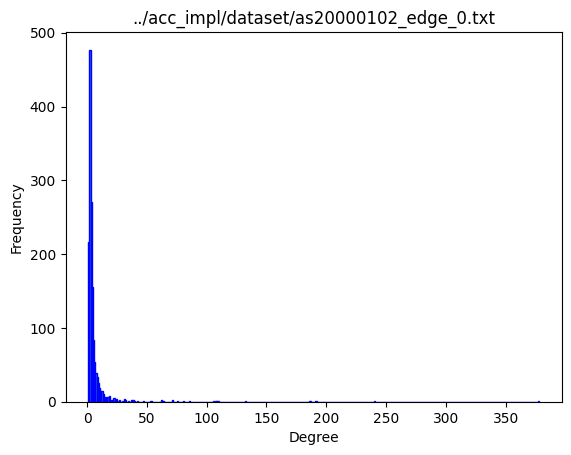

In [12]:
# Assuming your edge list file is named 'graph.txt'
plot_degree_distribution('../acc_impl/dataset/as20000102_edge_0.txt')

In [ ]:
plot_node_degrees('./dataset/as20000102_edge_0.txt')

Max degree: 420
Min degree: 1
Max degree node id: 14950
Min degree node id: 290


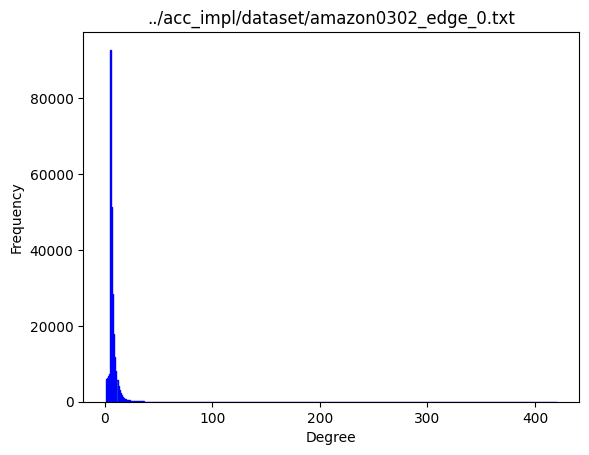

In [13]:
plot_degree_distribution('../acc_impl/dataset/amazon0302_edge_0.txt')

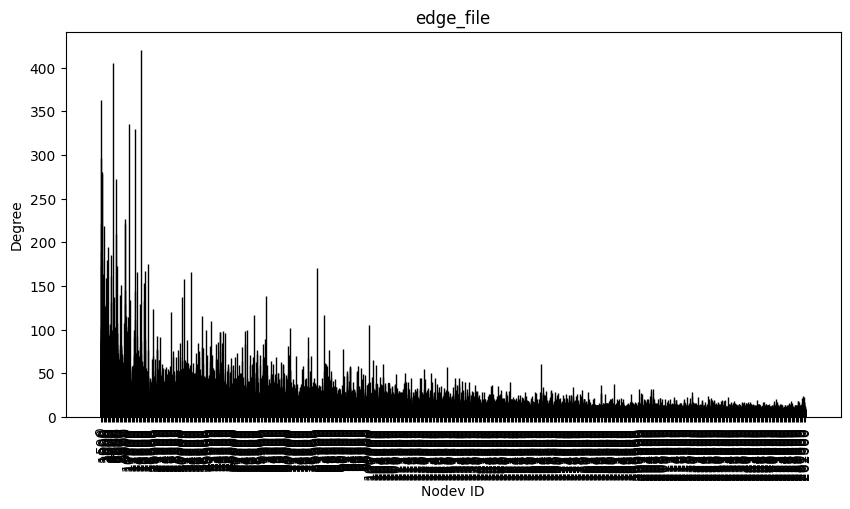

In [16]:
plot_node_degrees('../acc_impl/dataset/amazon0302_edge_0.txt')

In [ ]:
plot_degree_distribution('./dataset/facebook_combined_edge_0.txt')

In [ ]:
# Assuming your edge list file is named 'graph.txt'
plot_node_degrees('./dataset/facebook_combined_edge_0.txt')

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_adj_in_figure(edge_file):
    # Create an empty graph
    G = nx.Graph()

    # Read the edge list from the file and add to the graph
    edges = nx.read_edgelist(edge_file, nodetype=int)

    # Add edges to the graph
    G.add_edges_from(edges)

    # Prepare two lists to hold the source nodes and destination nodes
    src_nodes = []
    dest_nodes = []

    # Open the edge list file and read the edges
    with open(edge_file, 'r') as file:
        for i, line in enumerate(file):
            src, dest = map(int, line.strip().split())
            
            # append to the src_nodes and dest_nodes list
            src_nodes.append(src)
            dest_nodes.append(dest)

    # Plot the adjacency list of source nodes
    plt.figure(figsize=(10, 10))
    plt.plot(range(len(src_nodes)), src_nodes, marker='o', linestyle='', markersize=5, color='blue')
    plt.title(f"Adjacency List of Source Nodes from {edge_file}")
    plt.xlabel("Order of edge pairs")
    plt.ylabel("Node ID")
    plt.show()

    # Plot the adjacency list of destination nodes
    plt.figure(figsize=(10, 10))
    plt.plot(range(len(dest_nodes)), dest_nodes, marker='o', linestyle='', markersize=5, color='blue')
    plt.title(f"Adjacency List of Destination Nodes from {edge_file}")
    plt.xlabel("Order of edge pairs")
    plt.ylabel("Node ID")
    plt.show()

In [3]:
def plot_adj_in_figure(edge_file):
    # Prepare two lists to hold the source nodes and destination nodes
    src_nodes = []
    dest_nodes = []

    # Open the edge list file and read the edges
    with open(edge_file, 'r') as file:
        for i, line in enumerate(file):
            src, dest = map(int, line.strip().split())
            
            # append to the src_nodes list
            src_nodes.append(src)

            # append to the dest_nodes list only when dest > src
            if dest > src:
                dest_nodes.append(dest)
            else:
                dest_nodes.append(None)  # Use None for the case when dest <= src

    # Plot the source nodes
    plt.figure(figsize=(10, 10))
    plt.plot(range(len(src_nodes)), src_nodes, marker='o', linestyle='', markersize=2, color='blue')
    plt.title(f"Source Nodes from {edge_file}")
    plt.xlabel("Order of edge pairs")
    plt.ylabel("Node ID")
    plt.show()

    # Plot the destination nodes
    plt.figure(figsize=(10, 10))
    plt.plot(range(len(dest_nodes)), dest_nodes, marker='o', linestyle='', markersize=2, color='purple')
    plt.title(f"Destination Nodes from {edge_file}")
    plt.xlabel("Order of edge pairs")
    plt.ylabel("Node ID")
    plt.show()


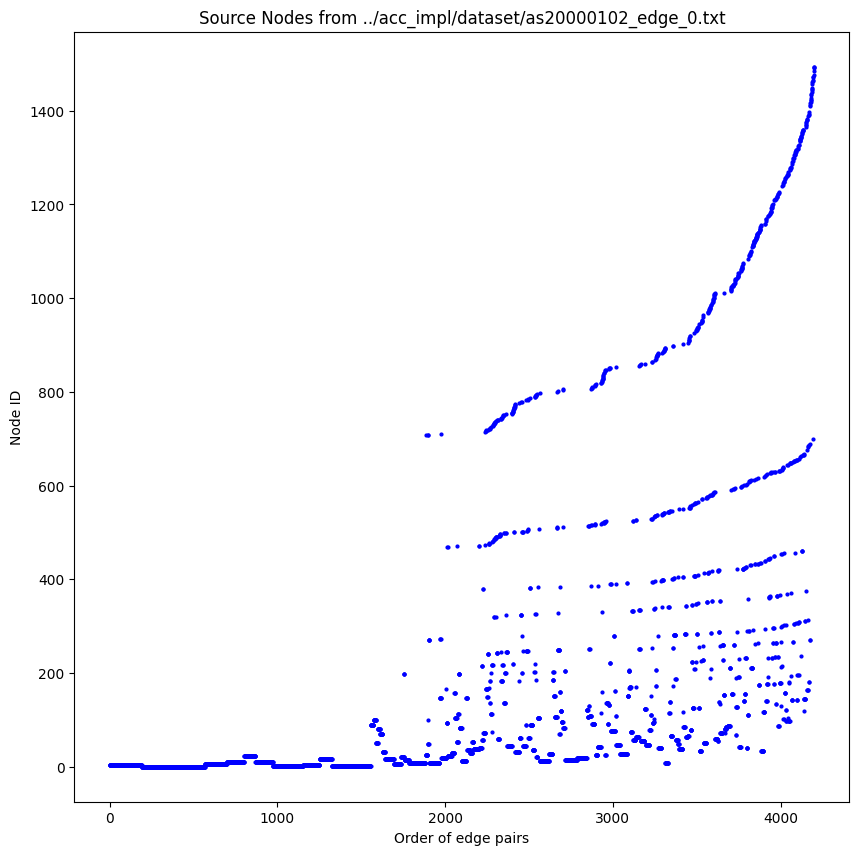

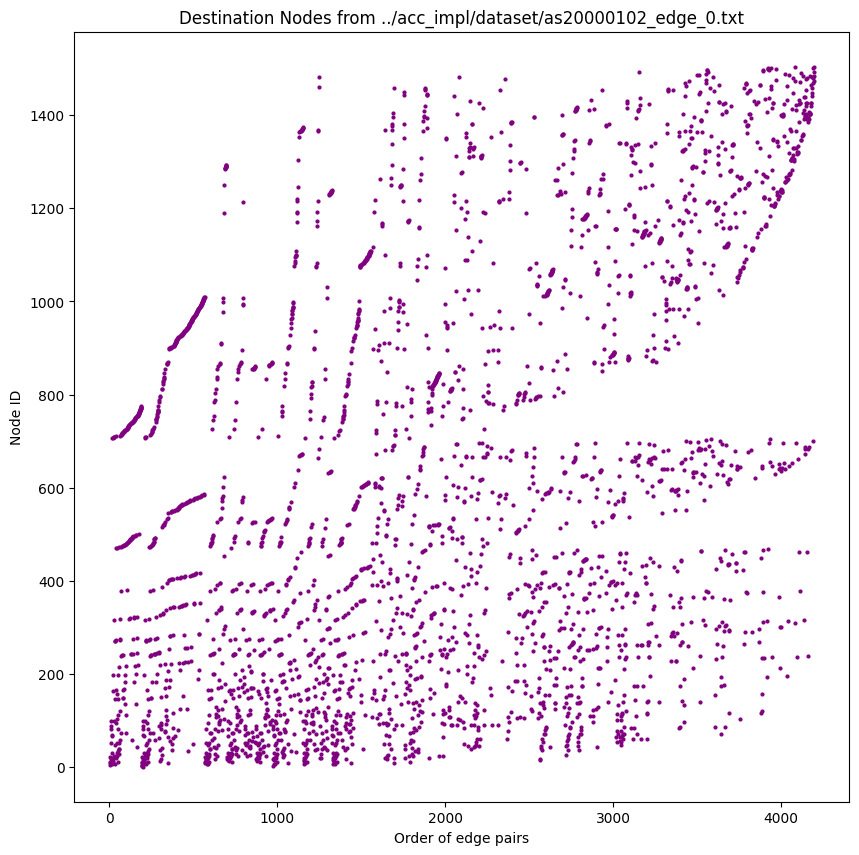

In [4]:
plot_adj_in_figure('../acc_impl/dataset/as20000102_edge_0.txt')

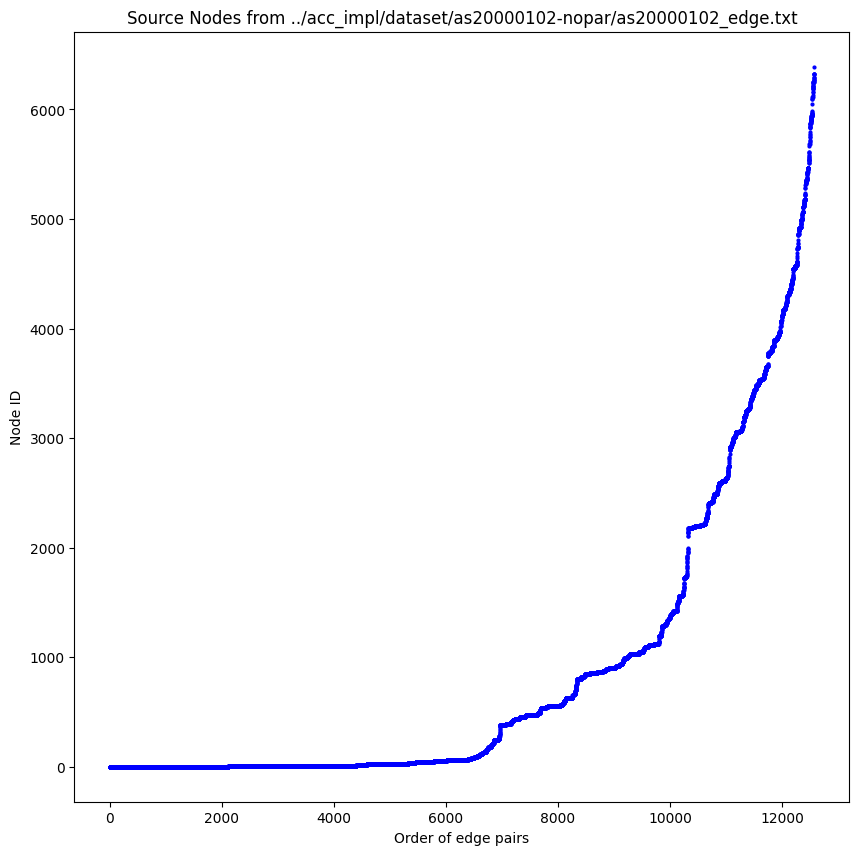

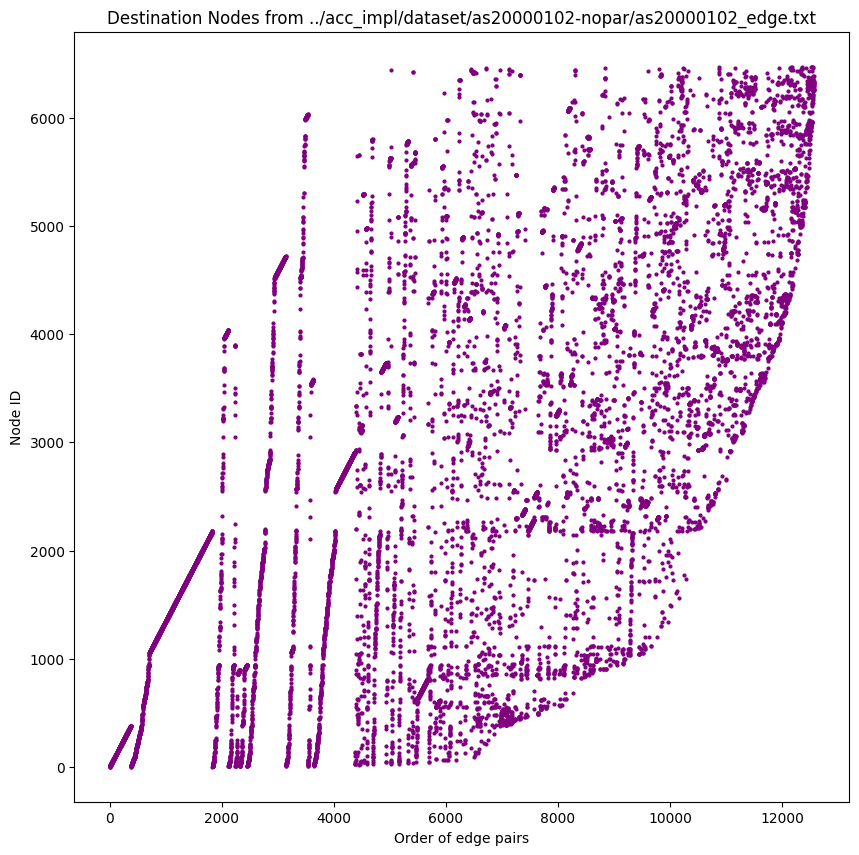

In [5]:
# Test it with your edge file
plot_adj_in_figure('../acc_impl/dataset/as20000102-nopar/as20000102_edge.txt')

In [6]:
def plot_adj_in_figure(edge_file):
    # Create an empty graph
    G = nx.Graph()

    # Read the edge list from the file and add to the graph
    G = nx.read_edgelist(edge_file, nodetype=int)

    # Prepare lists to hold the source nodes, destination nodes
    src_nodes = []
    dest_nodes = []

    # Open the edge list file and read the edges
    with open(edge_file, 'r') as file:
        for i, line in enumerate(file):
            src, dest = map(int, line.strip().split())
            
            # append to the src_nodes and dest_nodes list
            src_nodes.append(src)
            dest_nodes.append(dest)

    # Plot the source nodes, destination nodes, and larger adjacent nodes on the same graph
    plt.figure(figsize=(10, 10))
    plt.plot(range(len(src_nodes)), src_nodes, marker='o', linestyle='', markersize=2, color='blue', label='Source Nodes')
    plt.plot(range(len(dest_nodes)), dest_nodes, marker='o', linestyle='', markersize=2, color='red', label='Destination Nodes')

    # Iterate over the destination nodes and plot larger adjacent nodes vertically above them
    for i, dest in enumerate(dest_nodes):
        if str(dest) in G:
            larger_adj_nodes = [node for node in G.neighbors(str(dest)) if node > str(dest)]
            plt.plot([i]*len(larger_adj_nodes), larger_adj_nodes, marker='o', linestyle='', markersize=2, color='green', label='Larger Adjacent Nodes' if i == 0 else "")

    plt.title(f"Source, Destination, and Larger Adjacent Nodes from {edge_file}")
    plt.xlabel("Order of edge pairs")
    plt.ylabel("Node ID")
    plt.legend()
    plt.show()

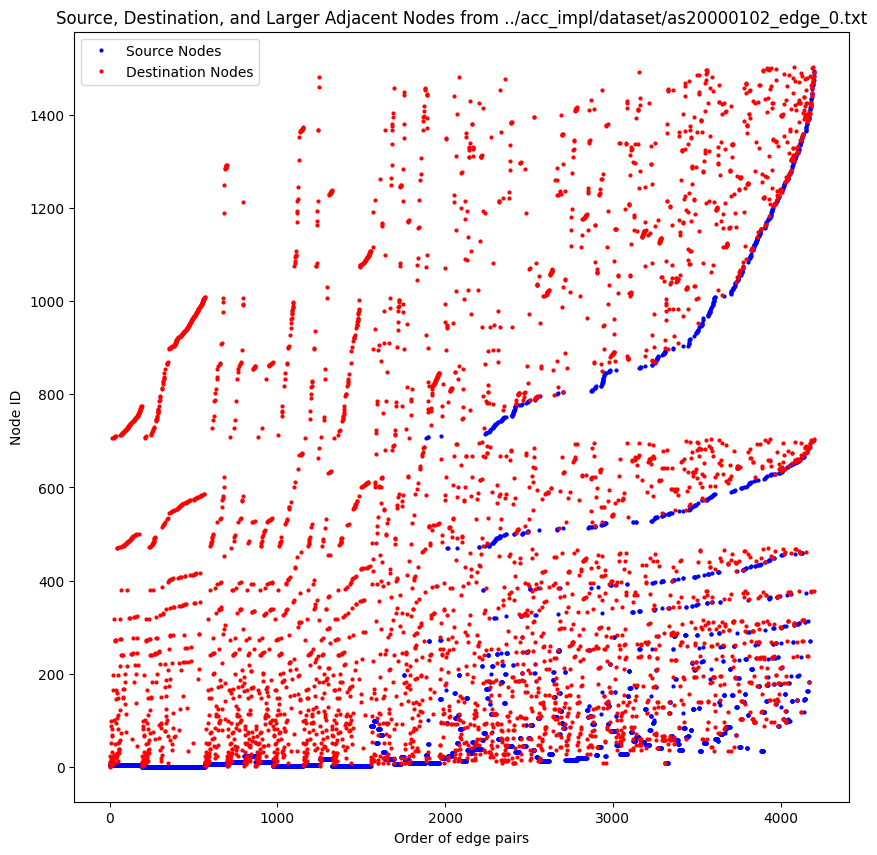

In [7]:
plot_adj_in_figure('../acc_impl/dataset/as20000102_edge_0.txt')